# Regression with CART Trees - Lab

## Introduction

In this lab, we shall put into practice, the skills shown in the previous code along. We shall use a simple dataset from Kaggle, called the ["Petrol Consumption Dataset"](https://www.kaggle.com/harinir/petrol-consumption) which entails the petrol consumption for a bunch of examples, based on drivers' features.

## Objectives
You will be able to:
- Conduct a regression experiment using CART trees
- Evaluate the model fit and study the impact of hyper parameters on the final tree
- Understand training, prediction, evaluation and visualizations required to run regression experiments using trees

## Import necessary libraries 

In [1]:
# Import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


## Read the dataset `petrol_consumption.csv` and view its head and dimensions

In [2]:
# Read the dataset and view head and dimensions
df = pd.read_csv('petrol_consumption.csv')
print(df.shape)

df.head()
# Code here

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Check the basic statistics for the dataset and inspect the target variable `Petrol_Consumption`

In [3]:
# Describe the dataset
df.describe().round(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000,48.000,48.000,48.000,48.000
mean,7.668,4241.833,5565.417,0.570,576.771
std,0.951,573.624,3491.507,0.055,111.886
min,5.000,3063.000,431.000,0.451,344.000
25%,7.000,3739.000,3110.250,0.530,509.500
50%,7.500,4298.000,4735.500,0.564,568.500
75%,8.125,4578.750,7156.000,0.595,632.750
max,10.000,5342.000,17782.000,0.724,968.000


## Create features, labels and train/test datasets with a 80/20 split

As with the classification task, we will divide our data into attributes/features and labels and consequently into training and test sets.

In [4]:
# Create datasets for training and test
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.Petrol_Consumption

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = .20)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (38, 4)
Shape y_train: (38,)
Shape X_test: (10, 4)
Shape y_test: (10,)


## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [5]:
# Train a regression tree model with training data 
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 10)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

 ## Using test set, make predictions and calculate the MAE, MSE and RMSE
 
To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The `sklearn` library contains functions that can help calculate these values for us. To do so, use this code from the `metrics` package.

In [6]:
# Predict and evaluate the predictions
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test)

print ('MSE score:', mse(y_test, y_pred))
print('R-sq score:',r2_score(y_test,y_pred))

MSE score: 4851.1
R-sq score: 0.48816450988357063


## Visualize the tree using `graphviz`

Let's visualize our learnt tree as we have been doing in previous lessons and labs. 

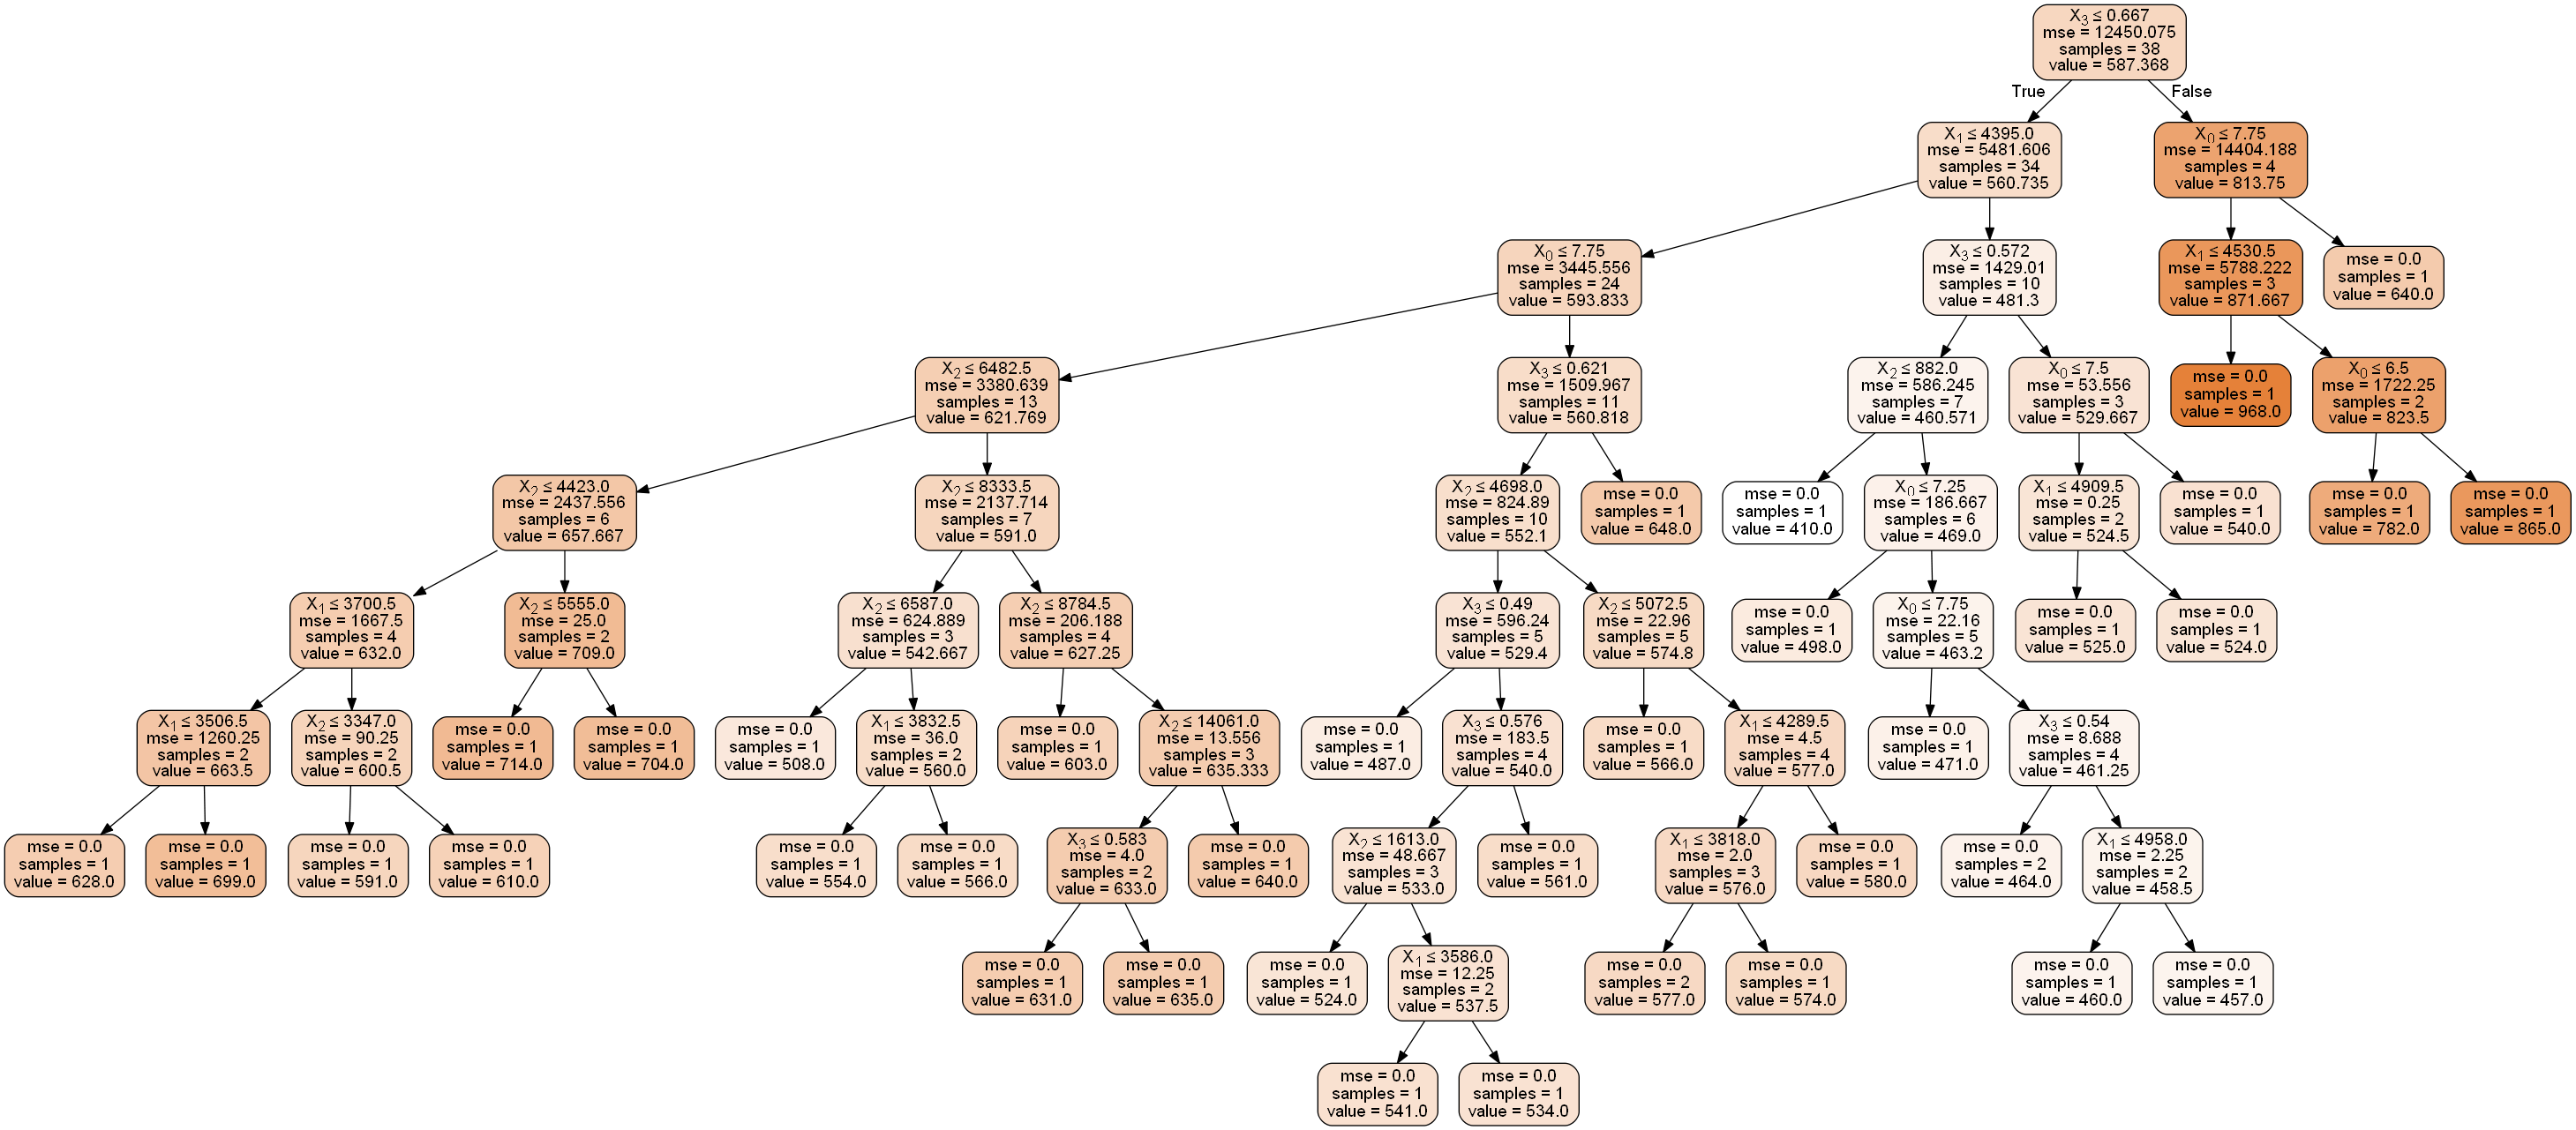

In [7]:
# Visualize the decision tree using graph viz library 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Level Up - Optional 

- In order to understand and interpret a tree structure, we need some domain knowledge in which the data was generated. That can help us inspect each leaf and investigate/prune the tree based on qualitative analysis. 

- Look at the hyper parameters used in the regression tree, check their values ranges in official doc and try running some optimization by growing a number of trees in a loop. 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results.

- Check for outliers, try normalization and see the impact on the output 

In [8]:
# Get column names first
df2 = df

# z-scores
for col in df.columns[:4]:
    df2[col] = (df[col] - df[col].mean()) / df[col].std()

df2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,1.40062,-1.169466,-1.028042,-0.817255,541
1,1.40062,-0.261205,-1.235975,0.030046,524
2,1.40062,-0.656935,-1.139742,0.174268,561
3,-0.17705,1.095085,-0.920639,-0.745144,414
4,0.34884,0.273989,-1.470545,-0.474729,410


In [9]:
X = df2.iloc[:,:-1]
y = df2.Petrol_Consumption

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = .20)

In [10]:
regressor = DecisionTreeRegressor(random_state = 10)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print ('MSE score:', mse(y_test, y_pred))
print('R-sq score:',r2_score(y_test,y_pred))

MSE score: 4851.1
R-sq score: 0.48816450988357063


In [15]:
# remove outliers

for col in df2.columns[:4]:
    df2 = df2.loc[(df2[col] < 3.5) & (df2[col] > -3.5)]
    
X = df2.iloc[:,:-1]
y = df2.Petrol_Consumption

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = .20)

regressor = DecisionTreeRegressor(random_state = 10, max_depth=3)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print ('MSE score:', mse(y_test, y_pred))
print('R-sq score:',r2_score(y_test,y_pred))

MSE score: 3913.719435930926
R-sq score: 0.5870667465795592


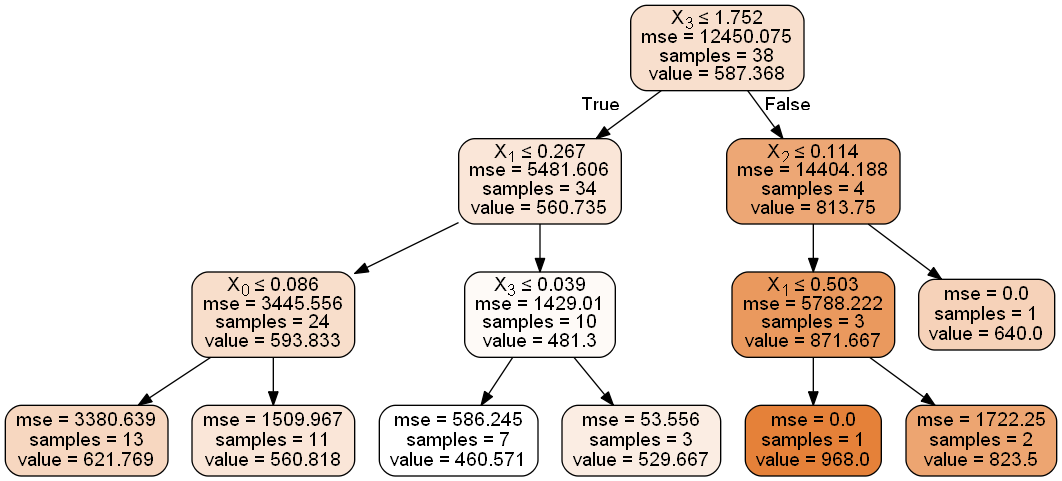

In [16]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Summary 

In this lesson, we developed a tree regressor architecture to train the regressor and predict values for unseen data. We saw that with a vanilla approach, the results were not so great, and this requires further pre-tuning of the model (what we described as hyper parameter optimization OR pruning in the case of trees. 